In [1]:
# author: Fahim Tajwar

from label_loader import *
from image_loader import *
from util import *
from models import *
from model_trainer import *
from dataset import *

In [2]:
file_name_1 = '../data/labels_cells_only.xlsx'
file_name_2 = '../data/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

set(['cell dies', 'grows dense', 'grows sparse'])
{'cell dies': 0, 'grows dense': 1, 'grows sparse': 2}
tensor([0.0260, 0.0294, 0.0097])


In [3]:
prefix = "../data/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{14: 243, 17: 248, 29: 265, 2082: 146, 42: 292, 2091: 147, 2094: 148, 2096: 149, 2099: 150, 52: 304, 2101: 151, 54: 308, 2107: 152, 62: 323, 2111: 153, 2114: 154, 67: 328, 68: 330, 2122: 155, 75: 341, 2124: 156, 2134: 157, 2135: 158, 2137: 159, 91: 348, 96: 349, 98: 350, 2147: 160, 100: 236, 101: 237, 111: 238, 360: 278, 2164: 161, 121: 239, 2751: 213, 128: 240, 2179: 162, 134: 241, 136: 242, 2193: 163, 2194: 164, 2199: 165, 153: 244, 159: 245, 2210: 166, 2215: 167, 169: 247, 2227: 168, 2228: 169, 183: 249, 187: 250, 2239: 171, 197: 251, 2249: 172, 202: 253, 2253: 173, 206: 254, 221: 255, 2278: 174, 2285: 175, 242: 256, 2291: 176, 250: 257, 2299: 177, 255: 258, 257: 259, 269: 260, 272: 261, 275: 262, 278: 263, 286: 264, 2337: 178, 292: 266, 2342: 179, 295: 267, 2344: 180, 2346: 181, 2351: 182, 307: 268, 2360: 183, 2361: 184, 317: 269, 2368: 185, 321: 270, 325: 271, 326: 272, 329: 273, 331: 274, 2387: 186, 2388: 187, 2389: 188, 2393: 189, 347: 275, 2397: 1

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[2693 1324  183 1801 2094 2432 1906 1046 2032 2991   75  331 2082  702
 2018 1644 2179  723 1004 2955 1389 1693 2099 2147 2666 2899 1086 1171
 1622  590 1859 2484 1141 1784  221  255 2360  418 2942 1175 2107 1457
 1060  121 2040  269 2337 1772 2414 1853  295   98 2114 2501 1786 1614
 1037   29 2227  455 2870 1824 2662 1819 1974 1480 1416 2541 1736  101
 1811 2231 1019 2579   76  434 2397 2017 1998 2857  153 2388  317  753
 2839 2278 2634  167 2361 1036  272  525 1804 2862   91 1849 1940 2342
   52 1023 2368   62 1838  593 2810  518  587 1848 2122   42 2101 1608
 1337  517 1934 1018 1125 1524 2193   68 1600 1825 1027  785 1303 1879
  387  635 1476 2164 2134 2939 1913 1006 1153 1714 1327  522  499  286
  111 1111 2972  424 2351 1962  608 1719 1146 1943 1233 2684 2194 1754
  399  456 2832   54  696 1866  464 1607 1672 1098 1835 2408 2210  561
 1870  187  767 2847  278   14 1611  384 2215 1900   17 1876  451 2344
  136 1176  755 2346 2640 1265 1078  389 2820 1055 1979  738 1958  329
  

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, 
                                 final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
conv_net_1 = Our2DConvNetDesign1(num_classes = 3)
model_1 = Model(conv_net_1, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1835
Epoch: [2/30], Loss: 1.1457
Epoch: [3/30], Loss: 1.1340
Epoch: [4/30], Loss: 1.1228
Epoch: [5/30], Loss: 1.0836
Epoch: [6/30], Loss: 1.1011
Epoch: [7/30], Loss: 1.0636
Epoch: [8/30], Loss: 1.0767
Epoch: [9/30], Loss: 1.0724
Epoch: [10/30], Loss: 1.0611
Epoch: [11/30], Loss: 1.0198
Epoch: [12/30], Loss: 1.0567
Epoch: [13/30], Loss: 1.0337
Epoch: [14/30], Loss: 1.0264
Epoch: [15/30], Loss: 1.0313
Epoch: [16/30], Loss: 1.0102
Epoch: [17/30], Loss: 1.0265
Epoch: [18/30], Loss: 0.9883
Epoch: [19/30], Loss: 1.0166
Epoch: [20/30], Loss: 0.9981
Epoch: [21/30], Loss: 0.9960
Epoch: [22/30], Loss: 0.9664
Epoch: [23/30], Loss: 0.9872
Epoch: [24/30], Loss: 0.9851
Epoch: [25/30], Loss: 0.9730
Epoch: [26/30], Loss: 0.9635
Epoch: [27/30], Loss: 0.9789
Epoch: [28/30], Loss: 0.9565
Epoch: [29/30], Loss: 0.9855
Epoch: [30/30], Loss: 0.9784
Training done!


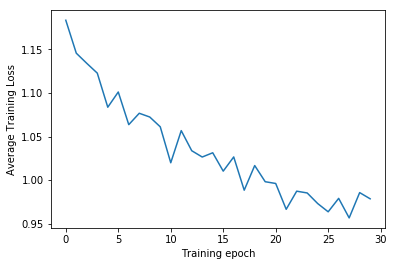

accuracy : 57.000000

('Frequency per class: ', {'cell dies': 63, 'grows dense': 53, 'grows sparse': 164})


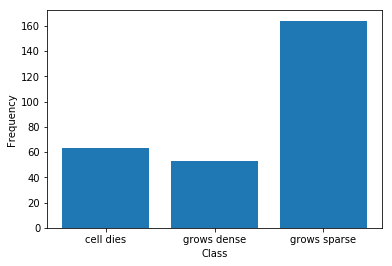

('Number of datapoints we got correct per class', {'cell dies': 42, 'grows dense': 25, 'grows sparse': 94})
('Accuracy per class', {'cell dies': 0.6666666666666666, 'grows dense': 0.4716981132075472, 'grows sparse': 0.573170731707317})


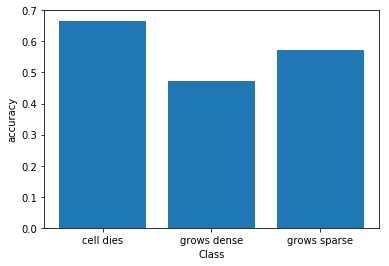

0.18024236846142044

In [8]:
model_1.train()

accuracy : 45.000000

('Frequency per class: ', {'cell dies': 6, 'grows dense': 7, 'grows sparse': 22})


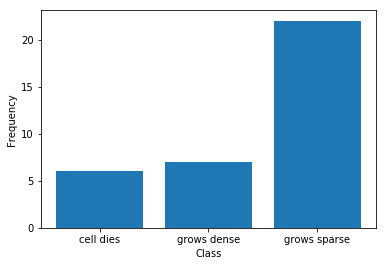

('Number of datapoints we got correct per class', {'cell dies': 4, 'grows dense': 3, 'grows sparse': 9})
('Accuracy per class', {'cell dies': 0.6666666666666666, 'grows dense': 0.42857142857142855, 'grows sparse': 0.4090909090909091})


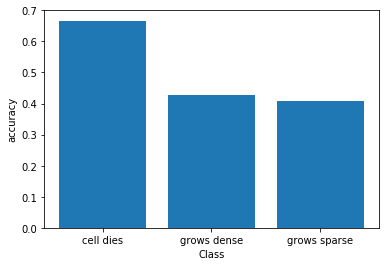

0.11688311688311688

In [9]:
model_1.test(validation_loader)

accuracy : 42.000000

('Frequency per class: ', {'cell dies': 8, 'grows dense': 11, 'grows sparse': 16})


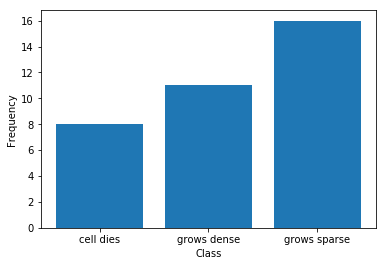

('Number of datapoints we got correct per class', {'cell dies': 4, 'grows dense': 4, 'grows sparse': 7})
('Accuracy per class', {'cell dies': 0.5, 'grows dense': 0.36363636363636365, 'grows sparse': 0.4375})


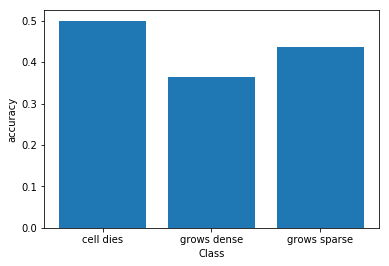

0.07954545454545454

In [10]:
model_1.test(test_loader)